<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

# Imports

In [29]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop, Ftrl

In [7]:
def load_quickdraw(path):
    """
    Loads the data, normalizes it, splits into target and feature
    Preforms train test split
    @param path: path to data
    returns : train test split tuple
    """
    data = np.load('../quickdraw10.npz')
    X = data['arr_0']
    y = data['arr_1']
    X = X  / 255
    X, y = shuffle(X, y)
    return train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train, X_test, y_train, y_test = load_quickdraw("../quickdraw10.npz")

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [11]:
def create_model(lr, opt):
    """
    Creates a nueral net
    @param lr: the learning rate for the net
    @param opt: the optimizer for the nueral net
    return : model
    """
    opt = opt(lr)
    model = Sequential([
        Dense(32, activation="relu", input_dim=784),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [52]:
sgd_512 = create_model(.01, SGD)

sgd_512.fit(X_train, y_train,epochs=25,batch_size=512,validation_data=(X_test,y_test))

Epoch 1/25
131/131 [==============================] - 0s 3ms/step - loss: 2.2149 - accuracy: 0.2411 - val_loss: 2.0856 - val_accuracy: 0.3461
Epoch 2/25
131/131 [==============================] - 0s 3ms/step - loss: 1.8995 - accuracy: 0.4211 - val_loss: 1.7081 - val_accuracy: 0.4728
Epoch 3/25
131/131 [==============================] - 0s 2ms/step - loss: 1.5655 - accuracy: 0.5089 - val_loss: 1.4555 - val_accuracy: 0.5379
Epoch 4/25
131/131 [==============================] - 0s 3ms/step - loss: 1.3755 - accuracy: 0.5618 - val_loss: 1.3152 - val_accuracy: 0.5853
Epoch 5/25
131/131 [==============================] - 0s 2ms/step - loss: 1.2599 - accuracy: 0.6010 - val_loss: 1.2199 - val_accuracy: 0.6202
Epoch 6/25
131/131 [==============================] - 0s 3ms/step - loss: 1.1761 - accuracy: 0.6348 - val_loss: 1.1462 - val_accuracy: 0.6478
Epoch 7/25
131/131 [==============================] - 0s 3ms/step - loss: 1.1111 - accuracy: 0.6595 - val_loss: 1.0891 - val_accuracy: 0.6686
Epoch 

In [56]:
sgd_300 = create_model(.01, SGD)

sgd_300.fit(X_train, y_train,epochs=25,batch_size=300,validation_data=(X_test,y_test))

Epoch 1/25
224/224 [==============================] - 1s 3ms/step - loss: 2.0564 - accuracy: 0.2893 - val_loss: 1.7314 - val_accuracy: 0.4568
Epoch 2/25
224/224 [==============================] - 0s 2ms/step - loss: 1.5030 - accuracy: 0.5415 - val_loss: 1.3337 - val_accuracy: 0.6012
Epoch 3/25
224/224 [==============================] - 1s 2ms/step - loss: 1.2364 - accuracy: 0.6309 - val_loss: 1.1629 - val_accuracy: 0.6514
Epoch 4/25
224/224 [==============================] - 1s 2ms/step - loss: 1.1057 - accuracy: 0.6680 - val_loss: 1.0647 - val_accuracy: 0.6805
Epoch 5/25
224/224 [==============================] - 0s 2ms/step - loss: 1.0278 - accuracy: 0.6924 - val_loss: 1.0023 - val_accuracy: 0.7021
Epoch 6/25
224/224 [==============================] - 0s 2ms/step - loss: 0.9761 - accuracy: 0.7078 - val_loss: 0.9610 - val_accuracy: 0.7153
Epoch 7/25
224/224 [==============================] - 1s 2ms/step - loss: 0.9386 - accuracy: 0.7203 - val_loss: 0.9267 - val_accuracy: 0.7285
Epoch 

In [55]:
sgd_100 = create_model(.01, SGD)

sgd_100.fit(X_train, y_train,epochs=25,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/25
670/670 [==============================] - 1s 2ms/step - loss: 1.6261 - accuracy: 0.4547 - val_loss: 1.1986 - val_accuracy: 0.6296
Epoch 2/25
670/670 [==============================] - 1s 2ms/step - loss: 1.0644 - accuracy: 0.6770 - val_loss: 0.9834 - val_accuracy: 0.7056
Epoch 3/25
670/670 [==============================] - 1s 2ms/step - loss: 0.9378 - accuracy: 0.7234 - val_loss: 0.9067 - val_accuracy: 0.7354
Epoch 4/25
670/670 [==============================] - 1s 2ms/step - loss: 0.8800 - accuracy: 0.7417 - val_loss: 0.8619 - val_accuracy: 0.7496
Epoch 5/25
670/670 [==============================] - 1s 2ms/step - loss: 0.8399 - accuracy: 0.7537 - val_loss: 0.8254 - val_accuracy: 0.7596
Epoch 6/25
670/670 [==============================] - 1s 2ms/step - loss: 0.8083 - accuracy: 0.7634 - val_loss: 0.7995 - val_accuracy: 0.7704
Epoch 7/25
670/670 [==============================] - 1s 2ms/step - loss: 0.7822 - accuracy: 0.7720 - val_loss: 0.7759 - val_accuracy: 0.7747
Epoch 

In [54]:
sgd_32 = create_model(.01, SGD)

sgd_32.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.1962 - accuracy: 0.6301 - val_loss: 0.9027 - val_accuracy: 0.7286
Epoch 2/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.8335 - accuracy: 0.7531 - val_loss: 0.7848 - val_accuracy: 0.7685
Epoch 3/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.7525 - accuracy: 0.7788 - val_loss: 0.7301 - val_accuracy: 0.7887
Epoch 4/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.7033 - accuracy: 0.7923 - val_loss: 0.6958 - val_accuracy: 0.7967
Epoch 5/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.6663 - accuracy: 0.8027 - val_loss: 0.6630 - val_accuracy: 0.8067
Epoch 6/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.6363 - accuracy: 0.8114 - val_loss: 0.6412 - val_accuracy: 0.8108
Epoch 7/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.6120 - accuracy: 0.8186 - val_loss: 0.6175 - val_accuracy:

In [53]:
sgd_8 = create_model(.01, SGD)

sgd_8.fit(X_train, y_train,epochs=25,batch_size=8,validation_data=(X_test,y_test))

Epoch 1/25
8375/8375 [==============================] - 12s 1ms/step - loss: 0.8917 - accuracy: 0.7316 - val_loss: 0.7063 - val_accuracy: 0.7951
Epoch 2/25
8375/8375 [==============================] - 12s 1ms/step - loss: 0.6463 - accuracy: 0.8079 - val_loss: 0.6114 - val_accuracy: 0.8187
Epoch 3/25
8375/8375 [==============================] - 12s 1ms/step - loss: 0.5735 - accuracy: 0.8289 - val_loss: 0.5674 - val_accuracy: 0.8336
Epoch 4/25
8375/8375 [==============================] - 12s 1ms/step - loss: 0.5337 - accuracy: 0.8398 - val_loss: 0.5474 - val_accuracy: 0.8382
Epoch 5/25
8375/8375 [==============================] - 12s 1ms/step - loss: 0.5062 - accuracy: 0.8485 - val_loss: 0.5433 - val_accuracy: 0.8406
Epoch 6/25
8375/8375 [==============================] - 12s 1ms/step - loss: 0.4876 - accuracy: 0.8534 - val_loss: 0.5278 - val_accuracy: 0.8447
Epoch 7/25
8375/8375 [==============================] - 12s 1ms/step - loss: 0.4702 - accuracy: 0.8577 - val_loss: 0.5245 - val_ac

In [57]:
batch_df = pd.DataFrame({"sgd_512_loss": sgd_512.history.history['val_loss'], "sgd_512_accuracy": sgd_512.history.history['val_accuracy'],
                       "sgd_300_loss": sgd_300.history.history['val_loss'], "sgd_300_accuracy": sgd_300.history.history['val_accuracy'],
                       "sgd_100_loss": sgd_100.history.history['val_loss'], "sgd_100_accuracy": sgd_100.history.history['val_accuracy'],
                       "sgd_32_loss": sgd_32.history.history['val_loss'], "sgd_32_accuracy": sgd_32.history.history['val_accuracy'],
                       "sgd_8_loss": sgd_8.history.history['val_loss'], "sgd_8_accuracy": sgd_8.history.history['val_accuracy']})
batch_df.head()

,sgd_512_loss,sgd_512_accuracy,sgd_300_loss,sgd_300_accuracy,sgd_100_loss,sgd_100_accuracy,sgd_32_loss,sgd_32_accuracy,sgd_8_loss,sgd_8_accuracy
0,2.085561,0.346091,1.731375,0.456848,1.198633,0.629606,0.902676,0.728636,0.706333,0.795091
1,1.708148,0.472818,1.333705,0.601212,0.983426,0.705576,0.784768,0.768545,0.611420,0.818667
2,1.455481,0.537879,1.162892,0.651364,0.906704,0.735394,0.730055,0.788667,0.567367,0.833636
3,1.315242,0.585333,1.064713,0.680485,0.861904,0.749636,0.695793,0.796727,0.547404,0.838182
4,1.219866,0.620212,1.002267,0.702121,0.825399,0.759606,0.662983,0.806727,0.543270,0.840636


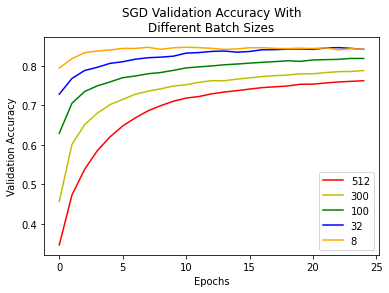

In [62]:
sns.lineplot(data=batch_df, color="r", x=range(25), y="sgd_512_accuracy", label="512")
sns.lineplot(data=batch_df, color="y", x=range(25), y="sgd_300_accuracy", label="300")
sns.lineplot(data=batch_df, color="g", x=range(25), y="sgd_100_accuracy", label="100")
sns.lineplot(data=batch_df, color="b", x=range(25), y="sgd_32_accuracy", label="32")
sns.lineplot(data=batch_df, color="orange", x=range(25), y="sgd_8_accuracy", label="8").set(xlabel="Epochs", ylabel = "Validation Accuracy", title="SGD Validation Accuracy With\nDifferent Batch Sizes");

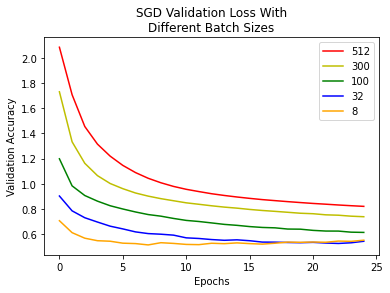

In [61]:
sns.lineplot(data=batch_df, color="r", x=range(25), y="sgd_512_loss", label="512")
sns.lineplot(data=batch_df, color="y", x=range(25), y="sgd_300_loss", label="300")
sns.lineplot(data=batch_df, color="g", x=range(25), y="sgd_100_loss", label="100")
sns.lineplot(data=batch_df, color="b", x=range(25), y="sgd_32_loss", label="32")
sns.lineplot(data=batch_df, color="orange", x=range(25), y="sgd_8_loss", label="8").set(xlabel="Epochs", ylabel = "Validation Accuracy", title="SGD Validation Loss With\nDifferent Batch Sizes");

## Write up an analysis of the experiments and select the "best" performing model among your experiments


Suprise suprise 32 did the best in both accuracy and loss. I thought that 32 would preform equally or barely lower than than 8 but i actually did better weird...

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [64]:
sgd_0001 = create_model(.0001, SGD)

sgd_0001.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.3321 - accuracy: 0.1021 - val_loss: 2.3103 - val_accuracy: 0.1043
Epoch 2/25
2094/2094 [==============================] - 3s 2ms/step - loss: 2.2941 - accuracy: 0.1117 - val_loss: 2.2765 - val_accuracy: 0.1208
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.2616 - accuracy: 0.1353 - val_loss: 2.2446 - val_accuracy: 0.1498
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.2291 - accuracy: 0.1683 - val_loss: 2.2112 - val_accuracy: 0.1882
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.1941 - accuracy: 0.2036 - val_loss: 2.1746 - val_accuracy: 0.2224
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.1554 - accuracy: 0.2391 - val_loss: 2.1337 - val_accuracy: 0.2613
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.1124 - accuracy: 0.2744 - val_loss: 2.0884 - val_accuracy:

In [67]:
sgd_001 = create_model(.001, SGD)

sgd_001.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.0785 - accuracy: 0.2813 - val_loss: 1.7822 - val_accuracy: 0.4403
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.5354 - accuracy: 0.5232 - val_loss: 1.3594 - val_accuracy: 0.5786
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.2509 - accuracy: 0.6167 - val_loss: 1.1725 - val_accuracy: 0.6399
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.1093 - accuracy: 0.6631 - val_loss: 1.0669 - val_accuracy: 0.6745
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.0268 - accuracy: 0.6890 - val_loss: 1.0019 - val_accuracy: 0.6945
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.9752 - accuracy: 0.7049 - val_loss: 0.9609 - val_accuracy: 0.7092
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.9397 - accuracy: 0.7180 - val_loss: 0.9292 - val_accuracy:

In [68]:
sgd_01 = create_model(.01, SGD)

sgd_01.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.2471 - accuracy: 0.6104 - val_loss: 0.9078 - val_accuracy: 0.7386
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.8470 - accuracy: 0.7511 - val_loss: 0.8029 - val_accuracy: 0.7633
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7665 - accuracy: 0.7766 - val_loss: 0.7410 - val_accuracy: 0.7848
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7119 - accuracy: 0.7926 - val_loss: 0.7020 - val_accuracy: 0.7958
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6674 - accuracy: 0.8047 - val_loss: 0.6652 - val_accuracy: 0.8057
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6315 - accuracy: 0.8141 - val_loss: 0.6327 - val_accuracy: 0.8163
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6044 - accuracy: 0.8217 - val_loss: 0.6153 - val_accuracy:

In [69]:
sgd_1 = create_model(.1, SGD)

sgd_1.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7930 - accuracy: 0.7539 - val_loss: 0.6332 - val_accuracy: 0.8105
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.5945 - accuracy: 0.8204 - val_loss: 0.5743 - val_accuracy: 0.8272
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.5382 - accuracy: 0.8363 - val_loss: 0.5586 - val_accuracy: 0.8335
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.5072 - accuracy: 0.8461 - val_loss: 0.5446 - val_accuracy: 0.8405
Epoch 5/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.4823 - accuracy: 0.8527 - val_loss: 0.5538 - val_accuracy: 0.8347
Epoch 6/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.4646 - accuracy: 0.8568 - val_loss: 0.5306 - val_accuracy: 0.8405
Epoch 7/25
2094/2094 [==============================] - 3s 2ms/step - loss: 0.4524 - accuracy: 0.8624 - val_loss: 0.5353 - val_accuracy:

In [70]:
sgd = create_model(1, SGD)

sgd.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.6821 - accuracy: 0.3679 - val_loss: 1.4529 - val_accuracy: 0.4153
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.6528 - accuracy: 0.3780 - val_loss: 1.6611 - val_accuracy: 0.3497
Epoch 3/25
2094/2094 [==============================] - 3s 2ms/step - loss: 1.8896 - accuracy: 0.2250 - val_loss: 1.9299 - val_accuracy: 0.1895
Epoch 4/25
2094/2094 [==============================] - 3s 2ms/step - loss: 1.9406 - accuracy: 0.1943 - val_loss: 1.9787 - val_accuracy: 0.1816
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.9912 - accuracy: 0.2032 - val_loss: 1.8990 - val_accuracy: 0.2350
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.9760 - accuracy: 0.1945 - val_loss: 1.9728 - val_accuracy: 0.1778
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.9591 - accuracy: 0.1834 - val_loss: 1.9570 - val_accuracy:

In [71]:
lr_df = pd.DataFrame({"sgd_0001_loss": sgd_0001.history.history['val_loss'], "sgd_0001_accuracy": sgd_0001.history.history['val_accuracy'],
                       "sgd_001_loss": sgd_001.history.history['val_loss'], "sgd_001_accuracy": sgd_001.history.history['val_accuracy'],
                       "sgd_01_loss": sgd_01.history.history['val_loss'], "sgd_01_accuracy": sgd_01.history.history['val_accuracy'],
                       "sgd_1_loss": sgd_1.history.history['val_loss'], "sgd_1_accuracy": sgd_1.history.history['val_accuracy'],
                       "sgd_loss": sgd.history.history['val_loss'], "sgd_accuracy": sgd.history.history['val_accuracy']})
lr_df.head()

,sgd_0001_loss,sgd_0001_accuracy,sgd_001_loss,sgd_001_accuracy,sgd_01_loss,sgd_01_accuracy,sgd_1_loss,sgd_1_accuracy,sgd_loss,sgd_accuracy
0,2.310325,0.104303,1.782179,0.440303,0.907768,0.738576,0.633225,0.810515,1.452924,0.415273
1,2.276468,0.120758,1.359392,0.578606,0.802862,0.763273,0.574260,0.827152,1.661072,0.349667
2,2.244572,0.149788,1.172482,0.639939,0.741030,0.784788,0.558597,0.833515,1.929880,0.189455
3,2.211236,0.188152,1.066931,0.674485,0.702001,0.795758,0.544572,0.840545,1.978737,0.181606
4,2.174625,0.222424,1.001924,0.694485,0.665168,0.805667,0.553823,0.834697,1.899018,0.235030


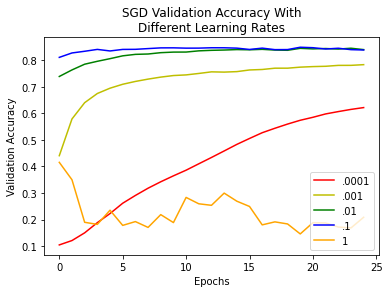

In [72]:
sns.lineplot(data=lr_df, color="r", x=range(25), y="sgd_0001_accuracy", label=".0001")
sns.lineplot(data=lr_df, color="y", x=range(25), y="sgd_001_accuracy", label=".001")
sns.lineplot(data=lr_df, color="g", x=range(25), y="sgd_01_accuracy", label=".01")
sns.lineplot(data=lr_df, color="b", x=range(25), y="sgd_1_accuracy", label=".1")
sns.lineplot(data=lr_df, color="orange", x=range(25), y="sgd_accuracy", label="1").set(xlabel="Epochs", ylabel = "Validation Accuracy", title="SGD Validation Accuracy With\nDifferent Learning Rates");

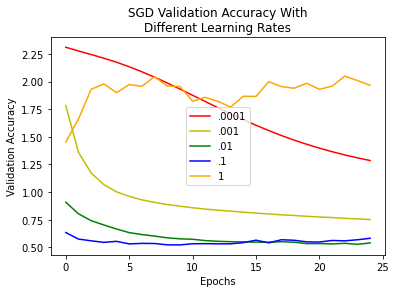

In [73]:
sns.lineplot(data=lr_df, color="r", x=range(25), y="sgd_0001_loss", label=".0001")
sns.lineplot(data=lr_df, color="y", x=range(25), y="sgd_001_loss", label=".001")
sns.lineplot(data=lr_df, color="g", x=range(25), y="sgd_01_loss", label=".01")
sns.lineplot(data=lr_df, color="b", x=range(25), y="sgd_1_loss", label=".1")
sns.lineplot(data=lr_df, color="orange", x=range(25), y="sgd_loss", label="1").set(xlabel="Epochs", ylabel = "Validation Accuracy", title="SGD Validation Accuracy With\nDifferent Learning Rates");

## Write up an analysis of the experiments and select the "best" performing model among your experiments


There seems to be an inequality here. Where x is the learning rate and p is a function that measure preformance, the optimal preformance lies here: .001 < p(x) < 1

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [21]:
adam_32 = create_model(.01, Adam)

adam_32.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7935 - accuracy: 0.7563 - val_loss: 0.7212 - val_accuracy: 0.7755
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6815 - accuracy: 0.7952 - val_loss: 0.6887 - val_accuracy: 0.7986
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6465 - accuracy: 0.8068 - val_loss: 0.6475 - val_accuracy: 0.8109
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6270 - accuracy: 0.8141 - val_loss: 0.6585 - val_accuracy: 0.8082
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6113 - accuracy: 0.8181 - val_loss: 0.6383 - val_accuracy: 0.8191
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.5988 - accuracy: 0.8229 - val_loss: 0.6325 - val_accuracy: 0.8169
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.5889 - accuracy: 0.8272 - val_loss: 0.6760 - val_accuracy:

In [23]:
sgd_32 = create_model(.01, SGD)

sgd_32.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.2314 - accuracy: 0.6107 - val_loss: 0.9115 - val_accuracy: 0.7368
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.8496 - accuracy: 0.7520 - val_loss: 0.8013 - val_accuracy: 0.7705
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7659 - accuracy: 0.7779 - val_loss: 0.7358 - val_accuracy: 0.7890
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7090 - accuracy: 0.7937 - val_loss: 0.7003 - val_accuracy: 0.7970
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6679 - accuracy: 0.8045 - val_loss: 0.6615 - val_accuracy: 0.8078
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6364 - accuracy: 0.8135 - val_loss: 0.6384 - val_accuracy: 0.8148
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6099 - accuracy: 0.8210 - val_loss: 0.6180 - val_accuracy:

In [24]:
ada_32 = create_model(.01, Adadelta)

ada_32.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.1095 - accuracy: 0.2532 - val_loss: 1.8837 - val_accuracy: 0.3656
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.6854 - accuracy: 0.4699 - val_loss: 1.5217 - val_accuracy: 0.5332
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.4083 - accuracy: 0.5697 - val_loss: 1.3192 - val_accuracy: 0.5914
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.2497 - accuracy: 0.6183 - val_loss: 1.1981 - val_accuracy: 0.6317
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.1515 - accuracy: 0.6512 - val_loss: 1.1186 - val_accuracy: 0.6599
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.0845 - accuracy: 0.6730 - val_loss: 1.0619 - val_accuracy: 0.6794
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 1.0353 - accuracy: 0.6909 - val_loss: 1.0185 - val_accuracy:

In [25]:
rm_32 = create_model(.01, RMSprop)

rm_32.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 5s 2ms/step - loss: 0.8532 - accuracy: 0.7489 - val_loss: 0.8506 - val_accuracy: 0.7502
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.8199 - accuracy: 0.7718 - val_loss: 0.8767 - val_accuracy: 0.7812
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.8259 - accuracy: 0.7742 - val_loss: 0.9014 - val_accuracy: 0.7812
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.8437 - accuracy: 0.7749 - val_loss: 0.8220 - val_accuracy: 0.7808
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.8629 - accuracy: 0.7765 - val_loss: 0.9122 - val_accuracy: 0.7608
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.8621 - accuracy: 0.7727 - val_loss: 0.8771 - val_accuracy: 0.7534
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 0.8911 - accuracy: 0.7649 - val_loss: 0.9250 - val_accuracy:

In [27]:
ft_32 = create_model(.01, Ftrl)

ft_32.fit(X_train, y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 2/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 3/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 4/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 5/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 6/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 7/25
2094/2094 [==============================] - 4s 2ms/step - loss: 2.2323 - accuracy: 0.1282 - val_loss: 2.0473 - val_accuracy:

In [41]:
opt_df = pd.DataFrame({"ftrl_val_loss": ft_32.history.history['val_loss'], "ftrl_val_accuracy": ft_32.history.history['val_accuracy'],
                       "rmsprop_val_loss": rm_32.history.history['val_loss'], "rmsprop_val_accuracy": rm_32.history.history['val_accuracy'],
                       "adadelta_val_loss": ada_32.history.history['val_loss'], "adadelta_val_accuracy": ada_32.history.history['val_accuracy'],
                       "sgd_val_loss": sgd_32.history.history['val_loss'], "sgd_val_accuracy": sgd_32.history.history['val_accuracy'],
                       "adam_val_loss": adam_32.history.history['val_loss'], "adam_val_accuracy": adam_32.history.history['val_accuracy']})
opt_df.head()

,ftrl_val_loss,ftrl_val_accuracy,rmsprop_val_loss,rmsprop_val_accuracy,adadelta_val_loss,adadelta_val_accuracy,sgd_val_loss,sgd_val_accuracy,adam_val_loss,adam_val_accuracy
0,2.302671,0.097424,0.850565,0.750242,1.883659,0.365606,0.911479,0.736788,0.721212,0.775455
1,2.302683,0.097424,0.876688,0.781182,1.521748,0.533212,0.801341,0.770515,0.688694,0.798606
2,2.302684,0.097424,0.901359,0.781242,1.319249,0.591424,0.735819,0.788970,0.647548,0.810909
3,2.302686,0.097424,0.821990,0.780849,1.198073,0.631697,0.700304,0.797000,0.658540,0.808152
4,2.302689,0.097424,0.912249,0.760758,1.118613,0.659879,0.661541,0.807849,0.638302,0.819061


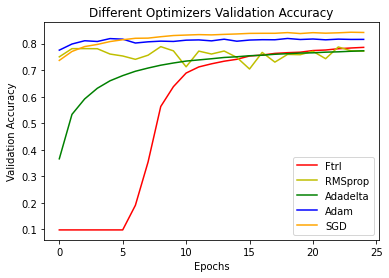

In [51]:
sns.lineplot(data=opt_df, color="r", x=range(25), y="ftrl_val_accuracy", label="Ftrl")
sns.lineplot(data=opt_df, color="y", x=range(25), y="rmsprop_val_accuracy", label="RMSprop")
sns.lineplot(data=opt_df, color="g", x=range(25), y="adadelta_val_accuracy", label="Adadelta")
sns.lineplot(data=opt_df, color="b", x=range(25), y="adam_val_accuracy", label="Adam")
sns.lineplot(data=opt_df, color="orange", x=range(25), y="sgd_val_accuracy", label="SGD").set(xlabel="Epochs", ylabel = "Validation Accuracy", title="Different Optimizers Validation Accuracy");

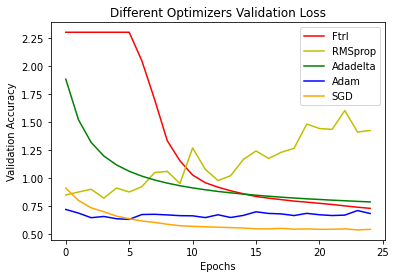

In [50]:
sns.lineplot(data=opt_df, color="r", x=range(25), y="ftrl_val_loss", label="Ftrl")
sns.lineplot(data=opt_df, color="y", x=range(25), y="rmsprop_val_loss", label="RMSprop")
sns.lineplot(data=opt_df, color="g", x=range(25), y="adadelta_val_loss", label="Adadelta")
sns.lineplot(data=opt_df, color="b", x=range(25), y="adam_val_loss", label="Adam")
sns.lineplot(data=opt_df, color="orange", x=range(25), y="sgd_val_loss", label="SGD").set(xlabel="Epochs", ylabel = "Validation Accuracy", title="Different Optimizers Validation Loss");

## Write up an analysis of the experiments and select the "best" performing model among your experiments.


Stochastic gradient descent preformed the best and had relatively little 'growth' in preformance overtime when compared to the other models. That's fine just compared to sat ftrl the jump in preformance over time was not nearly as signinicant. Adam was a close sond with Ftrl, RMSprop, and Adadelta trailing behind.

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 


Adjusting the weights assocciated to each nueron recursively on each epoch

## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


